In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout, Activation

from tensorflow.keras import regularizers

2023-09-26 10:18:55.823692: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-26 10:18:57.176969: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-26 10:18:57.179017: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-26 10:19:00.865849: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
df_users = pd.read_csv("Data/users.csv")
df_fusers = pd.read_csv("Data/fusers.csv")

In [8]:
print("Number of genuine users")
print(len(df_users))

print("Number of fake users")
print(len(df_fusers))

Number of genuine users
1481
Number of fake users
1337


In [10]:
#Creating numpy array of zeros for attribute isFake, here zero means fake user and 1 means genuine user
fk = np.zeros(len(df_fusers))

#creating an array of ones for isFake attribute
ntFk = np.ones(len(df_users))

#adding new attributes to the data frame of fake and genuine users
df_fusers["isFake"] = fk
df_users["isFake"] = ntFk

In [12]:
'''
Creating one single data frame by concatenating the two data frames
'''
combine_d = pd.concat([df_fusers, df_users], ignore_index=True)

combine_d.axes

[RangeIndex(start=0, stop=2818, step=1),
 Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
        'friends_count', 'favourites_count', 'listed_count', 'created_at',
        'url', 'lang', 'time_zone', 'location', 'default_profile',
        'default_profile_image', 'geo_enabled', 'profile_image_url',
        'profile_banner_url', 'profile_use_background_image',
        'profile_background_image_url_https', 'profile_text_color',
        'profile_image_url_https', 'profile_sidebar_border_color',
        'profile_background_tile', 'profile_sidebar_fill_color',
        'profile_background_image_url', 'profile_background_color',
        'profile_link_color', 'utc_offset', 'protected', 'verified',
        'description', 'updated', 'dataset', 'isFake'],
       dtype='object')]

In [14]:
combine_d.columns = combine_d.columns.str.strip()

combine_d.axes
#suffling the data
combine_d = combine_d.sample(frac=1).reset_index(drop=True)


In [16]:
combine_d.axes
# Creating target variable
target = combine_d.isFake

In [18]:
combine_d.drop(["isFake"], axis=1, inplace=True)
input_X= combine_d

In [20]:
target.reset_index(drop=True, inplace=True)

In [22]:
# Below will create a mapping of language with numerical value
language_ls = list(enumerate(np.unique(input_X["lang"])))
language_dict = {name : i for i, name in language_ls}
input_X.loc[:, "lang_num"] = input_X["lang"].map(lambda x: language_dict[x]).astype(int)

input_X.drop(["name"], axis=1, inplace=True)

In [24]:
input_X = input_X[[
    "statuses_count",
    "followers_count",
    "friends_count",
    "favourites_count",
    "lang_num",
    "listed_count",
    "geo_enabled",
    "utc_offset",
    "profile_use_background_image"
                        ]]

In [26]:
# imputing missing values with false
input_X = input_X.replace(np.nan, 0)

In [28]:
train_X, test_X, train_y, test_y = train_test_split(input_X, target, train_size=0.8, test_size=0.2, random_state=0)

In [30]:

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(2254, 9)
(564, 9)
(2254,)
(564,)


In [32]:
from numpy.random import seed
seed(1)

Epoch 1/8
71/71 [==============================] - 1s 5ms/step - loss: 26.8752 - accuracy: 0.9410
Epoch 2/8
71/71 [==============================] - 0s 3ms/step - loss: 13.3151 - accuracy: 0.9831
Epoch 3/8
71/71 [==============================] - 0s 6ms/step - loss: 6.9645 - accuracy: 0.9769
Epoch 4/8
71/71 [==============================] - 0s 2ms/step - loss: 4.0402 - accuracy: 0.9641
Epoch 5/8
71/71 [==============================] - 0s 3ms/step - loss: 2.5662 - accuracy: 0.9308
Epoch 6/8
71/71 [==============================] - 0s 3ms/step - loss: 1.2160 - accuracy: 0.9579
Epoch 7/8
71/71 [==============================] - 0s 3ms/step - loss: 1.0767 - accuracy: 0.9898
Epoch 8/8
71/71 [==============================] - 0s 3ms/step - loss: 0.6189 - accuracy: 0.9916
{'loss': [26.87519645690918, 13.315131187438965, 6.964498043060303, 4.040226459503174, 2.566215991973877, 1.2159788608551025, 1.076704502105713, 0.6189247965812683], 'accuracy': [0.9409937858581543, 0.9831410646438599, 0.9

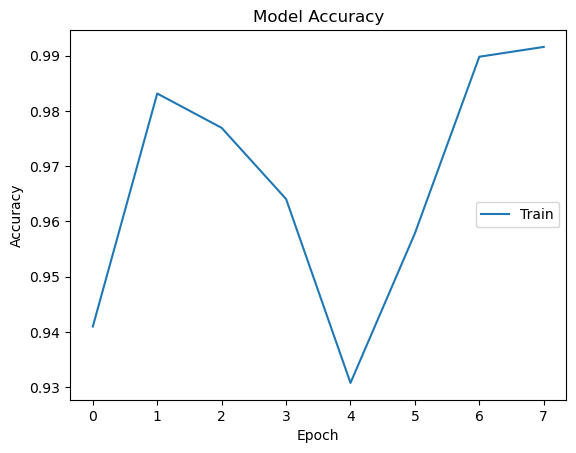

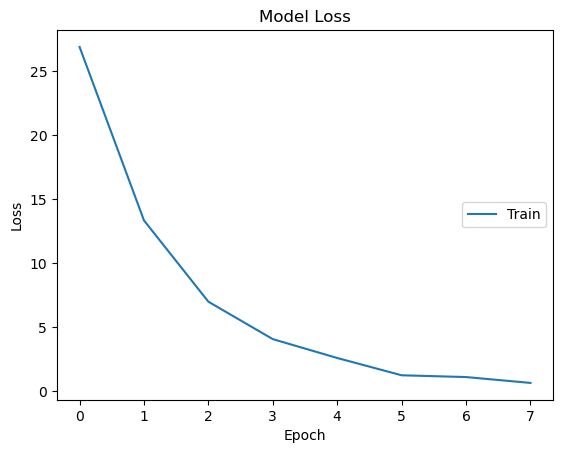

In [48]:
# Creating the model with one hidden layer 
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=9))
model.add(Dense(64, input_dim=32,
                kernel_regularizer=regularizers.l2(0.0079),
                activity_regularizer=regularizers.l1(0.0026), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_data = model.fit(train_X, train_y, epochs=8)

# Plot training & validation accuracy values
plt.plot(history_data.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()

# Plot training & validation loss values
plt.plot(history_data.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()

In [50]:
#Evaluating model on validation set
sc, accuracy = model.evaluate(test_X, test_y)

print("==================================================")
print("Accuracy for testing date",accuracy*100 )
print("==================================================")

18/18 [==============================] - 0s 1ms/step - loss: 0.3138 - accuracy: 0.9911
Accuracy for testing date 99.1134762763977
